In [1]:
#Import numpy, pandas etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import CSV file
df = pd.read_csv(r"C:\Users\jonas\Desktop\Julia\GitLab\marathons\raw_data\haspa_marathon_2018_2023.csv", sep = ",", engine = "python", encoding = "utf-8")

In [3]:
df


,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Brutto,Url_IDP,Year
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,02:04:09,02:04:09,84VSK2IQ371AD3&lang,2023
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),02:04:33,02:04:33,84VSK2IQ371ADE&lang,2023
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,02:06:18,02:06:18,84VSK2IQ371AD6&lang,2023
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),02:07:06,02:07:06,84VSK2IQ371AD5&lang,2023
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),02:08:08,02:08:08,84VSK2IQ371AE8&lang,2023
...,...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,M / W 45 1969-1973,06:12:56,06:23:56,99999915DBE17C00002DEC05&lang,2018
28748,7651,1026,"Koepke, Martin (GER)",7099,–,M / W 35 1979-1983,06:13:22,06:18:10,99999915DBE17400002B7B1B&lang,2018
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,M / W 60 1954-1958,06:13:53,06:14:04,99999915DBE17C00002E6DE1&lang,2018
28750,7653,36,"Lesiak, Jan (GER)",16184,–,M / W 70 1944-1948,06:13:57,06:21:29,99999915DBE17C00002E74BB&lang,2018


In [4]:
df.describe()

,Platz,Year
count,28752.000000,28752.000000
mean,3324.300605,2020.296432
std,2122.690331,2.019199
min,1.000000,2018.000000
25%,1438.000000,2018.000000
50%,3186.000000,2019.000000
75%,4983.000000,2022.000000
max,7774.000000,2023.000000


In [5]:
#Drop columns we don't need:
df.drop(columns=["Url_IDP", "Brutto"], inplace=True)

In [6]:
df.dtypes

#Column explanation:
#Platz = rank for respective race year (not sure if this is on "brutto"- or "netto" time)
#Pl.AK = rank for respective year and age group
#Name = runners name
#Startnr. = startnumber for respective year (--> could be a good unique identifier together with year)
#Verein/Team = optional field to enter training group/represented team
#AK = Age group in intervalls
#Finish = "Netto" time
#Brutto = "Brutto" time
#Year = Year of the race

#Important: "Brutto" is the time between the start sign was given until the runner approaches the goal; however, for us the Finish time ("Netto") is more relevant because this takes into account if the runner was rather at the back of his starting group (so it measures the exact time required to finish the respective distance)

Platz           int64
Pl.AK          object
Name           object
Startnr.       object
Verein/Team    object
AK             object
Finish         object
Year            int64
dtype: object

In [7]:
#Convert "Finish" column into datetime in order to make computations with this columns (not sure if there is a better way, because datatime will also assign a date to this column)
df["Finish"] = pd.to_datetime(df["Finish"], format = "%H:%M:%S")
df

#Add column with time required to finish the race in minutes ("Finish_Minutes")
import datetime as dt
df['Finish_Minutes'] = df['Finish'].dt.hour*60 + df['Finish'].dt.minute + df["Finish"].dt.second/60
df

,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Year,Finish_Minutes
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,1900-01-01 02:04:09,2023,124.150000
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:04:33,2023,124.550000
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,1900-01-01 02:06:18,2023,126.300000
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:07:06,2023,127.100000
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:08:08,2023,128.133333
...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,M / W 45 1969-1973,1900-01-01 06:12:56,2018,372.933333
28748,7651,1026,"Koepke, Martin (GER)",7099,–,M / W 35 1979-1983,1900-01-01 06:13:22,2018,373.366667
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,M / W 60 1954-1958,1900-01-01 06:13:53,2018,373.883333
28750,7653,36,"Lesiak, Jan (GER)",16184,–,M / W 70 1944-1948,1900-01-01 06:13:57,2018,373.950000


In [8]:
#Define a function that converts minutes into time format
def convert(n):
    return str(dt.timedelta(minutes=n))
    

#Test convert function:
n = df["Finish_Minutes"].iloc[1]
print(convert(n))

2:04:33


In [9]:
#Check if datetime transformation worked
(df["Finish"].loc[2])-(df["Finish"].loc[1])

Timedelta('0 days 00:01:45')

In [10]:
#Compute mean for Finish time:
df["Finish_Minutes"].mean()

240.06452014932296

In [11]:
#Group data by year of race:
raceyear_grp = df.groupby(["Year"])

In [12]:
#Test grouping:
raceyear_grp["Finish_Minutes"].agg(["median", "mean"])

,median,mean
Year,,
2018,242.741667,246.065079
2019,234.083333,236.365243
2021,239.000000,242.169708
2022,234.466667,237.254179
2023,236.783333,239.112015


In [13]:
#Test grouping:
raceyear_grp.get_group(2023)

,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Year,Finish_Minutes
0,1,1,"Koech, Bernard (KEN)",2,–,M/W 35 1984-1988,1900-01-01 02:04:09,2023,124.150000
1,2,1,"Belet, Joshua (KEN)",14,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:04:33,2023,124.550000
2,3,1,"Kosgei, Martin (KEN)",5,–,M/W 30 1989-1993,1900-01-01 02:06:18,2023,126.300000
3,4,2,"do Nascimento, Daniel (BRA)",4,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:07:06,2023,127.100000
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,MH/WH 1994-2005 (Hauptklasse),1900-01-01 02:08:08,2023,128.133333
...,...,...,...,...,...,...,...,...,...
6588,6589,959,"Jaster, Daniel (GER)",15590,–,M/W 30 1989-1993,1900-01-01 06:20:09,2023,380.150000
6589,6590,329,"Hetzel, Hans-Jürgen (GER)",14433,100 Marathon Club,M/W 60 1959-1963,1900-01-01 06:22:46,2023,382.766667
6590,6591,37,"Bülk, Jürgen (GER)",13425,–,M/W 70 1949-1953,1900-01-01 06:22:56,2023,382.933333
6591,6592,871,"Heinrich, Christoph (GER)",15168,–,M/W 45 1974-1978,1900-01-01 06:23:23,2023,383.383333


In [14]:
df["AK"].value_counts()

M / W 50 1964-1968    1279
M / W 45 1969-1973    1262
M / W 50 1965-1969    1234
M / W 45 1970-1974    1210
M / W 40 1974-1978    1143
                      ... 
M/W 80 1939-1943         4
M / W 80 1935-1939       3
M/W 85 1934-1938         1
M/W 80 1938-1942         1
M / W 80 1934-1938       1
Name: AK, Length: 63, dtype: int64

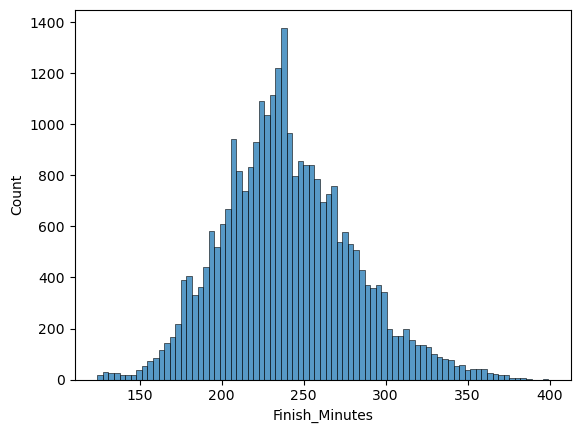

In [15]:
#Create simple histograms:
sns.histplot(data=df, x="Finish_Minutes")
plt.show()

In [16]:
#Explore Age Groups
raceyear_grp.get_group(2023)["AK"].unique()

#Age groups in data set:
#U20 (not clear if <18 is allowed/part of this category)
#18-29
#30-34
#35-39
#40-44
#45-49
#50-54
#55-59
#60-64
#65-70
#70-74
#75-79
#80-84
#85-89
# - (probablby not availble --> should we drop these?)

#Count how many have "-":
df.loc[lambda df: df["AK"] == "–"]["AK"].value_counts()

#Drop rows with "-":
df.drop(df.loc[df['AK']=="–"].index, inplace=True)
raceyear_grp.get_group(2023)["AK"].unique()

#Replace values for Age Group to a standard wording:
df.replace({'MH/WH 1994-2005 (Hauptklasse)':"<30", "M/W U20: Jg. 2004 und 2005": "<30", "M/W 30 1989-1993": "30-34","M/W 35 1984-1988": "35-39","M/W 40 1979-1983": "40-44",
           "M/W 45 1974-1978": "45-49","M/W 50 1969-1973": "50-54", "M/W 55 1964-1968": "55-59", "M/W 60 1959-1963": "60-64", "M/W 65 1954-1958": "65-69",
           "M/W 70 1949-1953": "70-74", "M/W 75 1944-1948":"75-79", "M/W 85 1934-1938":"85-89", "M/W 80 1939-1943":"80-84", "M/W 30 1988-1992":"30-34",
           "MH/WH 1993-2004 (Hauptklasse)":"<30", "M/W 35 1983-1987":"35-39","MH/WH 1993-2004 (Hauptklasse)":"<30", "M/W 30 1988-1992":"30-34",
           "M/W 40 1978-1982":"40-44",'M/W 45 1973-1977':"45-49",'M/W 50 1968-1972': "50-54", 'M/W 55 1963-1967':"55-59", 'M/W 60 1958-1962':"60-64",
            'M/W 65 1953-1957':"65-69", 'M/W 70 1948-1952':"70-74", 'M/W 75 1943-1947':"75-79",'M/W 80 1938-1942':"80-84",'MH / WH 1992-2003 (Hauptklasse)':"<30",
            'M / W 30 1987-1991':"30-34", 'M / W 35 1982-1986':"35-39", 'M / W 40 1977-1981':"40-44",'M / W 45 1972-1976':"45-49",'M / W 45 1972-1976':"45-49",
            'M / W 40 1977-1981':"40-44", 'M / W 35 1982-1986':"35-39",'M / W 30 1987-1991':"30-34", 'M / W 55 1962-1966':"55-59",'MH / WH 1992-2003 (Hauptklasse)':"<30",
            'M / W 50 1967-1971':"50-54",'M / W 60 1957-1961':"60-64", 'M / W 65 1952-1956':"65-69", 'M / W 70 1947-1951':"70-74",'M / W 75 1942-1946':"75-79",
            'MH / WH 1990-2001 (Hauptklasse)':"<30",'M / W 30 1985-1989':"30-34", 'M / W 35 1980-1984':"35-39", 'M / W 40 1975-1979':"40-44",'M / W 40 1975-1979':"40-44",
            'MH / WH 1990-2001 (Hauptklasse)':"<30",'M / W 30 1985-1989':"30-34", 'M / W 35 1980-1984':"35-39", 'M / W 45 1970-1974':"45-49",'M / W 50 1965-1969':"50-54",
            'M / W 55 1960-1964':"55-59", 'M / W 60 1955-1959':"60-64",'M / W 65 1950-1954':"65-69", 'M / W 70 1945-1949':"70-74", 'M / W 75 1940-1944':"75-79",'M / W 80 1935-1939':"80-84",
            'MH / WH 1989-2000 (Hauptklasse)':"<30",'M / W 30 1984-1988':"30-34", 'M / W 35 1979-1983':"35-39",'MH / WH 1989-2000 (Hauptklasse)':"<30", 'M / W 30 1984-1988':"30-34",
            'M / W 35 1979-1983':"35-39", 'M / W 40 1974-1978':"40-44", 'M / W 45 1969-1973':"45-49",'M / W 50 1964-1968':"50-54", 'M / W 55 1959-1963':"55-59", 'M / W 60 1954-1958':"60-64",
            'M / W 65 1949-1953':"65-69", 'U20':"<30", 'M / W 70 1944-1948':"70-74", 'M / W 75 1939-1943':"75-79", 'M / W 80 1934-1938':"80-84"}, inplace=True)

#Verify that replacement was successfull
df["AK"].unique()
df



,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Year,Finish_Minutes
0,1,1,"Koech, Bernard (KEN)",2,–,35-39,1900-01-01 02:04:09,2023,124.150000
1,2,1,"Belet, Joshua (KEN)",14,–,<30,1900-01-01 02:04:33,2023,124.550000
2,3,1,"Kosgei, Martin (KEN)",5,–,30-34,1900-01-01 02:06:18,2023,126.300000
3,4,2,"do Nascimento, Daniel (BRA)",4,–,<30,1900-01-01 02:07:06,2023,127.100000
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,<30,1900-01-01 02:08:08,2023,128.133333
...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,45-49,1900-01-01 06:12:56,2018,372.933333
28748,7651,1026,"Koepke, Martin (GER)",7099,–,35-39,1900-01-01 06:13:22,2018,373.366667
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,60-64,1900-01-01 06:13:53,2018,373.883333
28750,7653,36,"Lesiak, Jan (GER)",16184,–,70-74,1900-01-01 06:13:57,2018,373.950000


In [17]:
raceyear_grp.get_group(2019)["AK"].unique()

array(['40-44', '<30', '30-34', '35-39', '45-49', '50-54', '55-59',
       '60-64', '65-69', '70-74', '75-79', '80-84'], dtype=object)

In [18]:
df["Finish_Minutes"].quantile(q=[0.1])

0.1    191.5
Name: Finish_Minutes, dtype: float64

In [19]:
#Calculate several Quantiles by Group:

#1) Create functions to calculate different percentiles | Attention: Reverse logik since 10% percentile are the fastest runners
def p10(x):
    return x.quantile(0.1)

def p20(x):
    return x.quantile(0.20)

def p30(x):
    return x.quantile(0.30)

def p40(x):
    return x.quantile(0.4)

def p50(x):
    return x.quantile(0.5)

def p60(x):
    return x.quantile(0.6)

def p70(x):
    return x.quantile(0.7)

def p80(x):
    return x.quantile(0.8)

def p90(x):
    return x.quantile(0.9)


#Calcualte percentiles by Year:
temp = {"Finish_Minutes": [p10, p20, p30, p40, p50, p60, p70, p80, p90]}

df_percentilesbyyear = df.groupby("Year").agg(temp)
df_percentilesbyyear

Finish_Minutes                                                  \
                p10         p20         p30         p40         p50   
Year                                                                  
2018     196.666667  211.080000  223.910000  233.813333  242.733333   
2019     189.933333  206.223333  217.121667  226.066667  234.100000   
2021     194.876667  209.363333  220.073333  230.913333  239.000000   
2022     188.618333  204.806667  216.255000  226.366667  234.625000   
2023     187.795000  205.246667  217.885000  227.466667  236.791667   

                                                      
             p60         p70         p80         p90  
Year                                                  
2018  253.983333  265.140000  277.876667  298.316667  
2019  240.620000  252.650000  266.173333  285.965000  
2021  248.746667  259.093333  272.603333  292.960000  
2022  243.123333  255.198333  269.033333  288.810000  
2023  246.073333  257.943333  272.536667  292.410000

In [20]:
#sns.scatterplot(data=df_percentilesbyyear, x="Year", y="Finish_Minutes")
#plt.show()

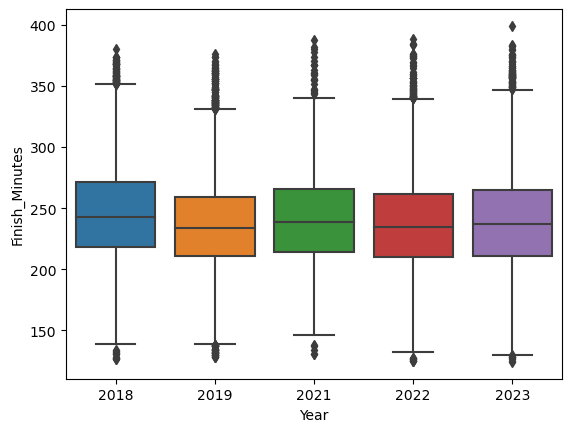

In [21]:
sns.boxplot(data=df, x="Year", y="Finish_Minutes")
plt.show()

In [22]:
#Group by Year and Age Group:
df.groupby(["AK", "Year"]).agg({"Finish_Minutes": "mean"})

Finish_Minutes
AK    Year                
30-34 2018      240.208670
      2019      225.500419
      2021      232.140369
      2022      227.326634
      2023      228.398001
35-39 2018      237.079402
      2019      228.323175
      2021      234.271759
      2022      226.421814
      2023      227.031373
40-44 2018      239.073826
      2019      228.638552
      2021      234.567944
      2022      228.877901
      2023      232.106262
45-49 2018      243.232713
      2019      234.325771
      2021      239.527304
      2022      233.714208
      2023      238.911845
50-54 2018      250.343980
      2019      241.063169
      2021      245.871131
      2022      244.660598
      2023      243.720652
55-59 2018      257.937415
      2019      248.700609
      2021      260.180084
      2022      251.575499
      2023      248.811712
60-64 2018      269.721861
      2019      258.544329
      2021      263.353030
      2022      261.419825
      2023      264.776545
65-69 2018      279.468954
      2019      274.403906
      2021      286.614646
      2022      275.427083
      2023      277.327016
70-74 2018      306.732407
      2019      286.789922
      2021      298.318519
      2022      297.204878
      2023      304.810360
75-79 2018      313.988095
      2019      304.506140
      2021      333.090741
      2022      322.291667
      2023      295.679167
80-84 2018      340.650000
      2019      332.694444
      2022      384.283333
      2023      344.487500
85-89 2023      237.800000
<30   2018      244.873963
      2019      234.078163
      2021      233.356886
      2022      231.448556
      2023      240.050682

In [23]:
_df

,Platz,Pl.AK,Name,Startnr.,Verein/Team,AK,Finish,Year,Finish_Minutes
0,1,1,"Koech, Bernard (KEN)",2,–,35-39,1900-01-01 02:04:09,2023,124.150000
1,2,1,"Belet, Joshua (KEN)",14,–,<30,1900-01-01 02:04:33,2023,124.550000
2,3,1,"Kosgei, Martin (KEN)",5,–,30-34,1900-01-01 02:06:18,2023,126.300000
3,4,2,"do Nascimento, Daniel (BRA)",4,–,<30,1900-01-01 02:07:06,2023,127.100000
4,5,3,"Kilimo, Rhonzas (KEN)",24,–,<30,1900-01-01 02:08:08,2023,128.133333
...,...,...,...,...,...,...,...,...,...
28747,7650,1262,"Lopes, Francisco (GER)",14148,BSV,45-49,1900-01-01 06:12:56,2018,372.933333
28748,7651,1026,"Koepke, Martin (GER)",7099,–,35-39,1900-01-01 06:13:22,2018,373.366667
28749,7652,291,"Reinert, Jürgen (GER)",15463,ERGOsports,60-64,1900-01-01 06:13:53,2018,373.883333
28750,7653,36,"Lesiak, Jan (GER)",16184,–,70-74,1900-01-01 06:13:57,2018,373.950000


In [24]:
# printed the data frame to csv
df.to_csv(r'C:\Users\jonas\Desktop\Julia\GitLab\marathons\raw_data\marathon_data_cleaned_summary.csv', index=False, encoding='utf-8')